# 信用情報の分析

## 【問題1】コンペティション内容の把握

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [107]:
train=pd.read_csv("application_train.csv")

### 信用情報の分析
#### ・Home Creditはどのような企業？
→実績のない人々に対しても広く借り入れの機会を与えている金融業社

#### ・このコンペティションでは何を予測する？
→過去の取引やアカウント情報から顧客の返済能力を予測する

#### ・それを予測することで企業が得られるメリットは何か？
→返済能力を正確に分析することにより個人に合ったローン提案ができ、不良債権のリスクヘッジにもなる。


## 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスごとのデータ数をグラフに出す
それぞれ結果に対する説明や考察も行ってください。

In [10]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
#全行表示
pd.set_option('display.max_rows', 307511)
# pd.set_option('display.max_columns',122)
train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

データを確認すると数値と文字列が混同し、欠損値も含まれていることがわかる。

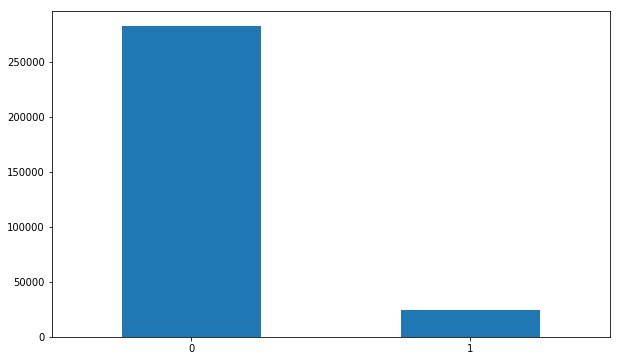

In [9]:
#ターゲット変数の分布表示
count = pd.value_counts(train["TARGET"], sort = True)
count.plot(kind = "bar", rot = 0, figsize = (10,6));

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

欠損値の確認、削除することでデータの正確性を向上させ、ターゲット変数と相関のある特徴量を確認する。

## 【問題4】データ探索

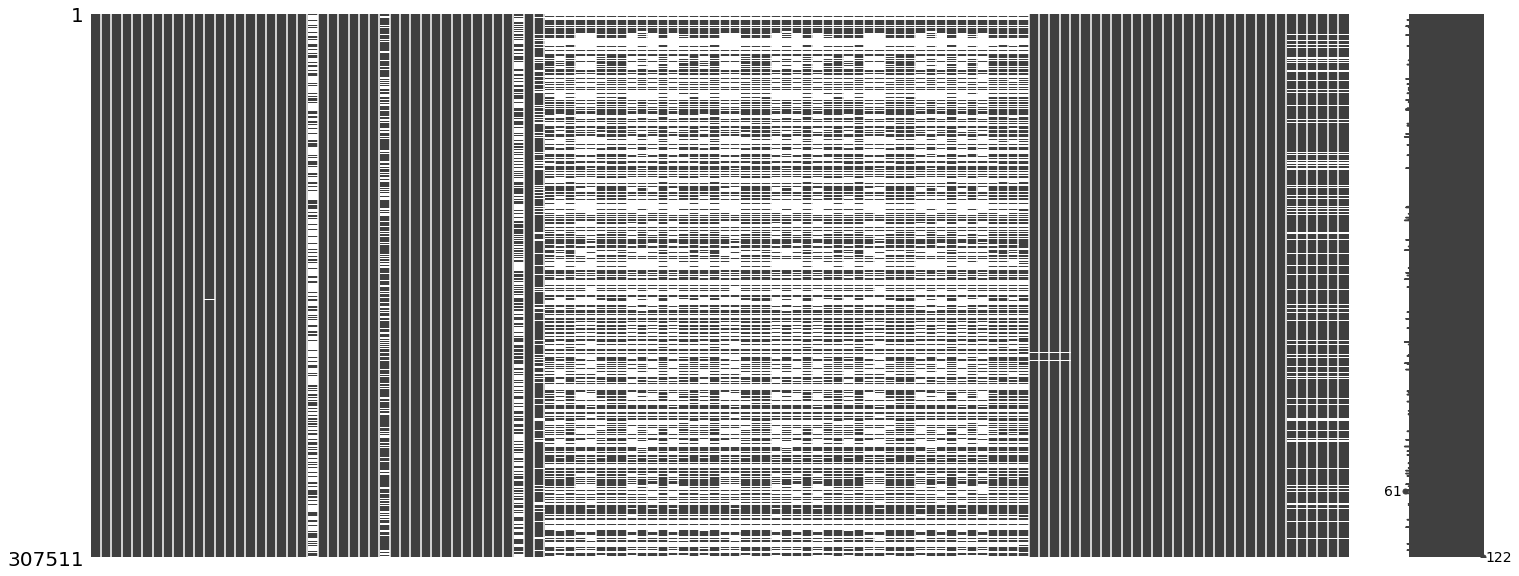

In [3]:
import missingno as msno
msno.matrix(train)

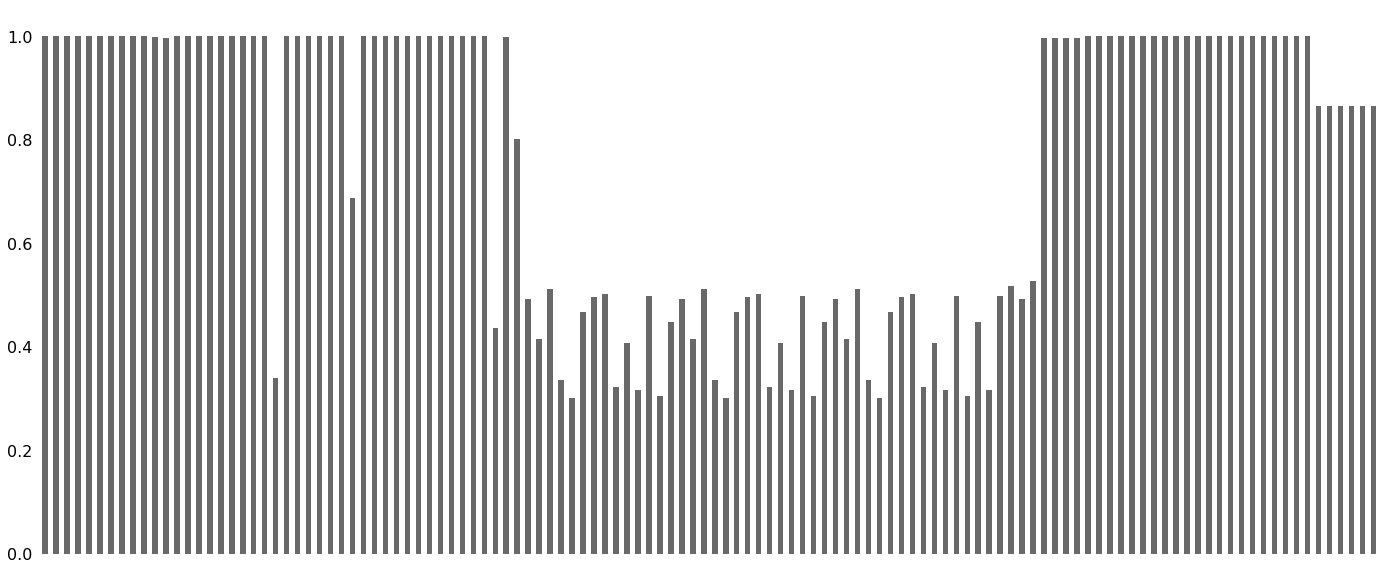

In [14]:
msno.bar(train)

In [4]:
total = train.isnull().sum().sort_values(ascending=False)
missing_ratio =(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.set_option('display.max_rows', 307511)
    
train_missing = pd.concat([total, missing_ratio],axis = 1,keys = ["total","missing_ratio"])
train_missing

,total,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


In [ ]:
train_new = train.drop(train_missing[train_missing["total"]>10].index,1)
train_new

In [12]:
train_new.dropna(how = "any", axis= 0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,State servant,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,Commercial associate,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,State servant,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [13]:
msno.bar(train_new);

NameError: name 'train_new' is not defined

In [ ]:
count1 = pd.value_counts(train_new["TARGET"],sort = True)
count1.plot(kind = "bar", rot = 0,figsize=(10,6))

## 【問題3】課題設定

各特徴量とTAGETの相関を調べる

ヒートマップで相関性がありそうなものをピックアップ
仮説：


## 【問題4】データ探索

In [14]:
import seaborn as sns

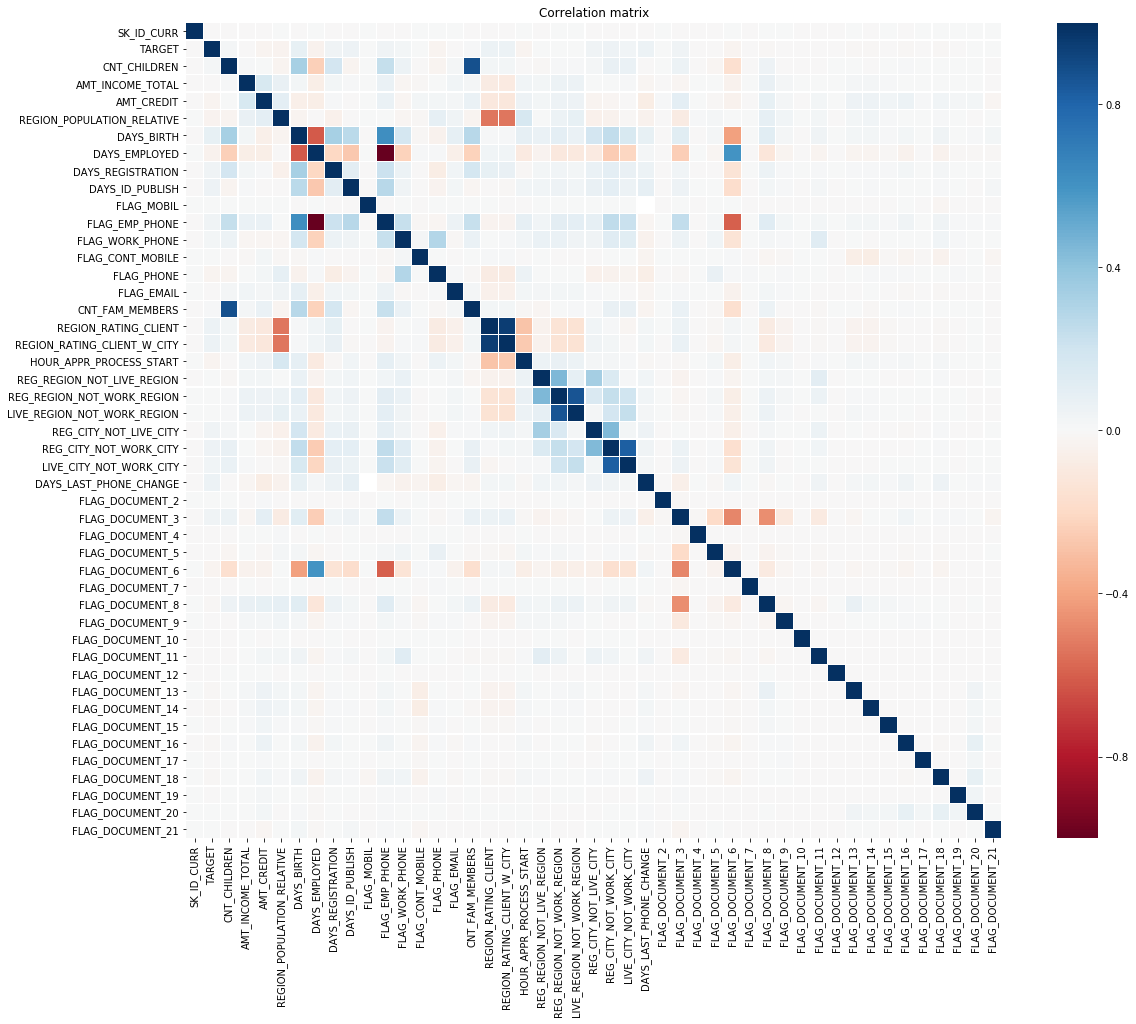

In [27]:
corrmat = train_new.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(20, 15))
plt.title('Correlation matrix')
sns.heatmap(corrmat,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

Null値を削除することでデータの正確性が増し、ターゲット変数と特徴量の相関が明確になる予想したが、特別にターゲットとの相関が高い変数が見つからなかった。

## 【問題3】課題設定
上で削除した変数に相関が高いデータが含まれていたと仮定し、Null値を削除ではなく、補間・置換として処理してみる。
## 【問題4】データ探索

In [5]:
 #補間・置換(train)
null_sum = 0
for col in train.columns:
    #欠損の補間
    null_sum = train[col].isnull().sum()
    train_length = train[col].count()
    if null_sum > 0:
        if null_sum/train_length >= 0.6:
             train = train.drop(col, axis=1)

        else:
            if train[col].dtype == object:
                train[col] = train[col].fillna(train[col].mode()[0])
            else:
                train[col] = train[col].fillna(train[col].mean())
    

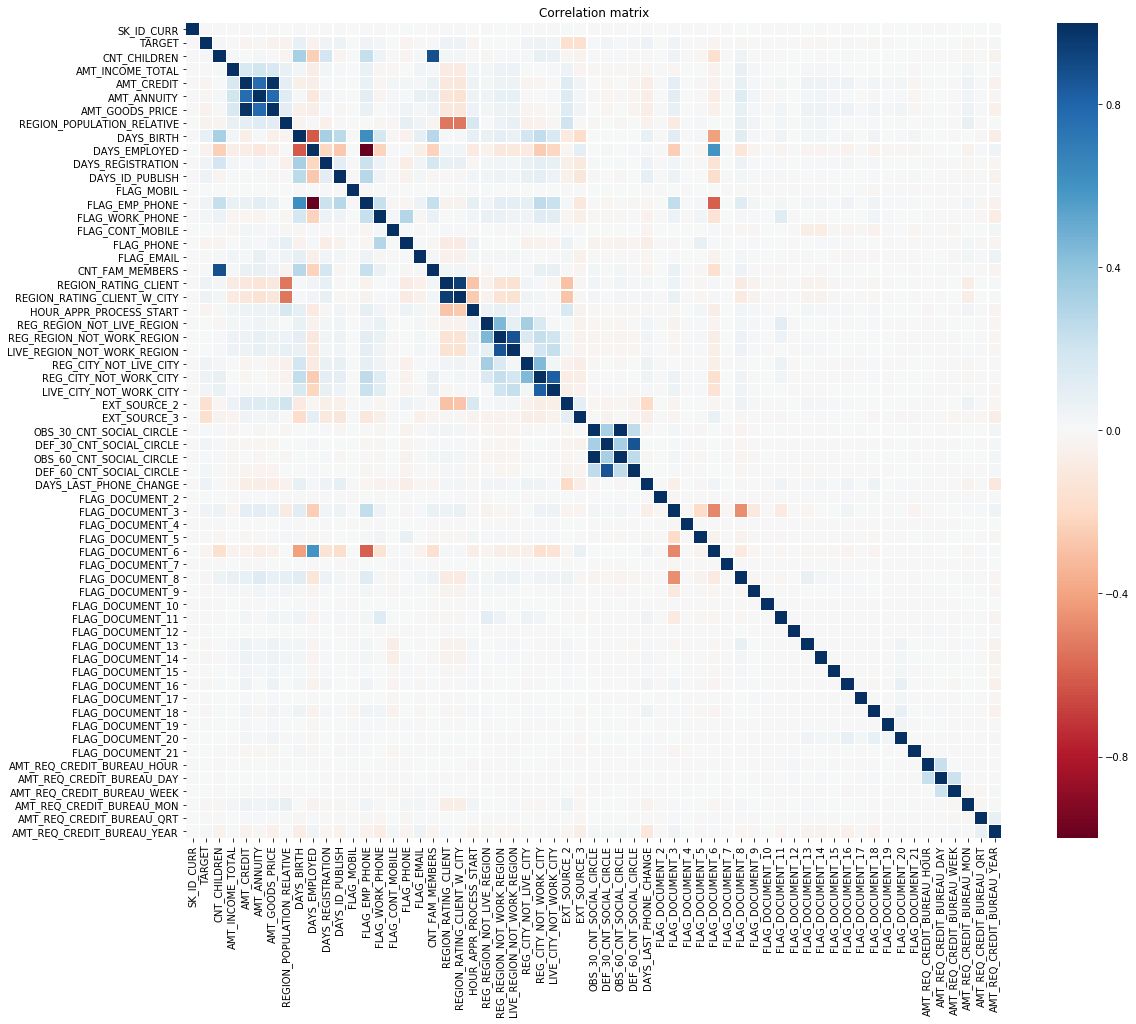

In [33]:
#相関マップ表示
corrmat1 = train.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(20, 15))
plt.title('Correlation matrix')
sns.heatmap(corrmat1,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [28]:
#相関係数の確認
corrmat1[["EXT_SOURCE_2","EXT_SOURCE_3"]].head()

,EXT_SOURCE_2,EXT_SOURCE_3
SK_ID_CURR,0.002339,0.000199
TARGET,-0.160303,-0.157397
CNT_CHILDREN,-0.017996,-0.038483
AMT_INCOME_TOTAL,0.060917,-0.029287
AMT_CREDIT,0.131129,0.039182


In [30]:
corrmat1["TARGET"].sort_values(ascending=True)

EXT_SOURCE_2                  -0.160303
EXT_SOURCE_3                  -0.157397
DAYS_EMPLOYED                 -0.044932
AMT_GOODS_PRICE               -0.039628
REGION_POPULATION_RELATIVE    -0.037227
AMT_CREDIT                    -0.030369
FLAG_DOCUMENT_6               -0.028602
HOUR_APPR_PROCESS_START       -0.024166
FLAG_PHONE                    -0.023806
AMT_ANNUITY                   -0.012817
FLAG_DOCUMENT_16              -0.011615
FLAG_DOCUMENT_13              -0.011583
AMT_REQ_CREDIT_BUREAU_MON     -0.011356
FLAG_DOCUMENT_14              -0.009464
FLAG_DOCUMENT_8               -0.008040
FLAG_DOCUMENT_18              -0.007952
FLAG_DOCUMENT_15              -0.006536
FLAG_DOCUMENT_9               -0.004352
FLAG_DOCUMENT_11              -0.004229
AMT_INCOME_TOTAL              -0.003982
FLAG_DOCUMENT_17              -0.003378
FLAG_DOCUMENT_4               -0.002672
SK_ID_CURR                    -0.002108
AMT_REQ_CREDIT_BUREAU_QRT     -0.001842
FLAG_EMAIL                    -0.001758


EXT_SOURCE_2（-0.160303）,  EXT_SOURCE_3(-0.157397)に非常に微かな負の相関があるみたいだ。

In [57]:
#相関がみられた特徴量同士の相関はどうか
corr=train_1.corr()
corr

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
EXT_SOURCE_2,1.000000,0.096653,-0.091885,-0.160303
EXT_SOURCE_3,0.096653,1.000000,-0.181252,-0.157397
DAYS_BIRTH,-0.091885,-0.181252,1.000000,0.078239
TARGET,-0.160303,-0.157397,0.078239,1.000000


あまり高いとは言えない

わずかに相関のある特徴量を抽出し、ターゲット変数ごとの分布を確認してみる。

In [34]:
train_1=train[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH', 'TARGET']]

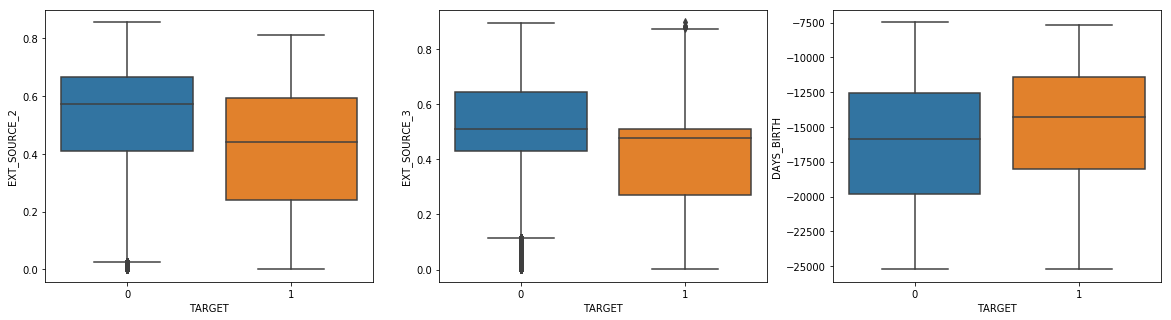

In [45]:
import seaborn as sns
fig, ax=plt.subplots(1,3,figsize=(20,5))
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=train_1, ax=ax[0])
sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=train_1, ax=ax[1])
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=train_1, ax=ax[2])
plt.show()

多少分布にズレがあることがわかる

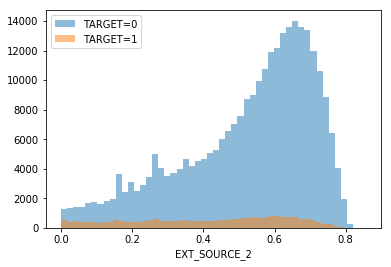

In [98]:
#EXT_SOURCE_2の分布を確認
plt.hist(train.iloc[:][train.TARGET == 0]["EXT_SOURCE_2"],bins=50,alpha=0.5, label="TARGET=0")
plt.hist(train.iloc[:][train.TARGET == 1]["EXT_SOURCE_2"],bins=50,alpha=0.5, label="TARGET=1")
plt.xlabel("EXT_SOURCE_2")
plt.legend()
plt.show()

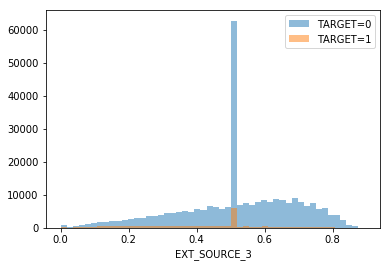

In [99]:
#EXT_SOURCE_3の分布を確認
plt.hist(train.iloc[:][train.TARGET == 0]["EXT_SOURCE_3"],bins=50,alpha=0.5, label="TARGET=0")
plt.hist(train.iloc[:][train.TARGET == 1]["EXT_SOURCE_3"],bins=50,alpha=0.5, label="TARGET=1")
plt.xlabel("EXT_SOURCE_3")
plt.legend()
plt.show()

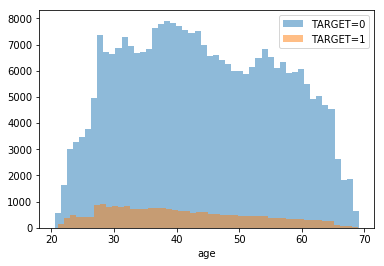

In [86]:
#DAYS_BIRTHを−３６５で割りと年齢の分布を確認
DAYS_BIRTH=train["DAYS_BIRTH"]/(-365)
plt.hist(train.iloc[:][train.TARGET == 0]["DAYS_BIRTH"]/(-365),bins=50,alpha=0.5, label="TARGET=0")
plt.hist(train.iloc[:][train.TARGET == 1]["DAYS_BIRTH"]/(-365),bins=50,alpha=0.5, label="TARGET=1")
plt.xlabel("age")
plt.legend()
plt.show()

これら3つの変数と相関の高い変数を見ていく。

In [54]:
#EXT_SOURCE_2
corrmat1.loc["EXT_SOURCE_2"].sort_values(ascending=True)

REGION_RATING_CLIENT          -2.926098e-01
REGION_RATING_CLIENT_W_CITY   -2.880152e-01
DAYS_LAST_PHONE_CHANGE        -1.955688e-01
TARGET                        -1.603032e-01
DAYS_BIRTH                    -9.188484e-02
REG_CITY_NOT_WORK_CITY        -7.588664e-02
DAYS_REGISTRATION             -5.983566e-02
LIVE_CITY_NOT_WORK_CITY       -5.883531e-02
DAYS_ID_PUBLISH               -5.090137e-02
REG_CITY_NOT_LIVE_CITY        -4.322036e-02
DEF_60_CNT_SOCIAL_CIRCLE      -3.226678e-02
FLAG_DOCUMENT_3               -3.066692e-02
DEF_30_CNT_SOCIAL_CIRCLE      -3.032970e-02
DAYS_EMPLOYED                 -2.073939e-02
AMT_REQ_CREDIT_BUREAU_YEAR    -2.026532e-02
OBS_30_CNT_SOCIAL_CIRCLE      -1.919005e-02
OBS_60_CNT_SOCIAL_CIRCLE      -1.883371e-02
FLAG_WORK_PHONE               -1.882328e-02
FLAG_DOCUMENT_6               -1.867862e-02
CNT_CHILDREN                  -1.799642e-02
FLAG_DOCUMENT_21              -7.236180e-03
FLAG_DOCUMENT_11              -4.359327e-03
AMT_REQ_CREDIT_BUREAU_HOUR    -3

In [55]:
#EXT_SOURCE_3
corrmat1.loc["EXT_SOURCE_3"].sort_values(ascending=True)

DAYS_BIRTH                    -1.812522e-01
TARGET                        -1.573966e-01
DAYS_ID_PUBLISH               -1.162699e-01
FLAG_EMP_PHONE                -1.031504e-01
DAYS_REGISTRATION             -9.624509e-02
REG_CITY_NOT_WORK_CITY        -7.080705e-02
REG_CITY_NOT_LIVE_CITY        -6.881066e-02
AMT_REQ_CREDIT_BUREAU_YEAR    -6.843321e-02
DAYS_LAST_PHONE_CHANGE        -6.792594e-02
FLAG_WORK_PHONE               -5.694112e-02
FLAG_EMAIL                    -4.735106e-02
REG_REGION_NOT_WORK_REGION    -4.321048e-02
REG_REGION_NOT_LIVE_REGION    -4.257396e-02
LIVE_CITY_NOT_WORK_CITY       -3.944991e-02
CNT_CHILDREN                  -3.848301e-02
HOUR_APPR_PROCESS_START       -3.600852e-02
DEF_30_CNT_SOCIAL_CIRCLE      -3.251411e-02
DEF_60_CNT_SOCIAL_CIRCLE      -3.052981e-02
AMT_INCOME_TOTAL              -2.928662e-02
FLAG_DOCUMENT_3               -2.737716e-02
LIVE_REGION_NOT_WORK_REGION   -2.615646e-02
CNT_FAM_MEMBERS               -2.505946e-02
AMT_REQ_CREDIT_BUREAU_WEEK    -2

In [56]:
#DAYS_BIRTH
corrmat1.loc["DAYS_BIRTH"].sort_values(ascending=True)

DAYS_EMPLOYED                 -0.615864
FLAG_DOCUMENT_6               -0.407160
EXT_SOURCE_3                  -0.181252
EXT_SOURCE_2                  -0.091885
AMT_REQ_CREDIT_BUREAU_YEAR    -0.066107
AMT_CREDIT                    -0.055436
AMT_GOODS_PRICE               -0.053416
FLAG_PHONE                    -0.042402
REGION_POPULATION_RELATIVE    -0.029582
FLAG_CONT_MOBILE              -0.014985
AMT_REQ_CREDIT_BUREAU_QRT     -0.010836
FLAG_MOBIL                    -0.003084
FLAG_DOCUMENT_4               -0.002789
SK_ID_CURR                    -0.001500
AMT_REQ_CREDIT_BUREAU_WEEK    -0.001227
FLAG_DOCUMENT_2               -0.001191
FLAG_DOCUMENT_10              -0.000168
DEF_30_CNT_SOCIAL_CIRCLE       0.000205
FLAG_DOCUMENT_12               0.000236
AMT_REQ_CREDIT_BUREAU_MON      0.001260
FLAG_DOCUMENT_7                0.001469
DEF_60_CNT_SOCIAL_CIRCLE       0.001922
AMT_REQ_CREDIT_BUREAU_DAY      0.002071
FLAG_DOCUMENT_19               0.003614
AMT_REQ_CREDIT_BUREAU_HOUR     0.004854


DAYS_BIRTHとFLAG_EMP_PHONE(0.619888), DAYS_EMPLOYED(-0.615864)が相関が高い

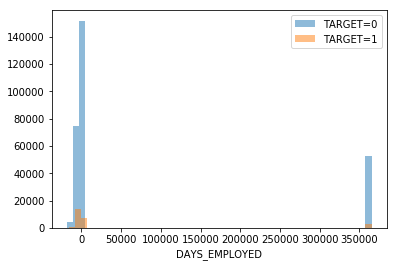

In [97]:
#DAYS_EMPLOYEDの分布を確認
DAYS_BIRTH=train["DAYS_BIRTH"]/(-365)
plt.hist(train.iloc[:][train.TARGET == 0]["DAYS_EMPLOYED"],bins=50,alpha=0.5, label="TARGET=0")
plt.hist(train.iloc[:][train.TARGET == 1]["DAYS_EMPLOYED"],bins=50,alpha=0.5, label="TARGET=1")
plt.xlabel("DAYS_EMPLOYED")
plt.legend()
plt.show()

大差はないがTARGET1は、雇用期間０付近に多少多く分布している。

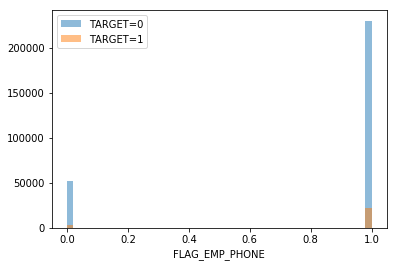

In [96]:
#DAYS_EMPLOYEDの分布を確認
DAYS_BIRTH=train["DAYS_BIRTH"]/(-365)
plt.hist(train.iloc[:][train.TARGET == 0]["FLAG_EMP_PHONE"],bins=50,alpha=0.5, label="TARGET=0")
plt.hist(train.iloc[:][train.TARGET == 1]["FLAG_EMP_PHONE"],bins=50,alpha=0.5, label="TARGET=1")
plt.xlabel("FLAG_EMP_PHONE")
plt.legend()
plt.show()

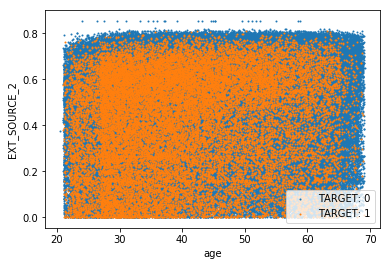

In [101]:
#EXT_SOURCE_2
plt.scatter(x=train[train["TARGET"]==0]["DAYS_BIRTH"]/(-365), y=train[train["TARGET"]==0]["EXT_SOURCE_2"], s=1, label="TARGET: 0")
plt.scatter(x=train[train["TARGET"]==1]["DAYS_BIRTH"]/(-365), y=train[train["TARGET"]==1]["EXT_SOURCE_2"], s=1, label="TARGET: 1")
plt.xlabel("age")
plt.ylabel("EXT_SOURCE_2")
plt.legend()
plt.show()

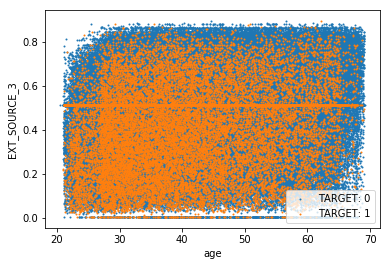

In [106]:
#EXT_SOURCE_３
plt.scatter(x=train[train["TARGET"]==0]["DAYS_BIRTH"]/(-365), y=train[train["TARGET"]==0]["EXT_SOURCE_3"], s=1, label="TARGET: 0")
plt.scatter(x=train[train["TARGET"]==1]["DAYS_BIRTH"]/(-365), y=train[train["TARGET"]==1]["EXT_SOURCE_3"], s=1, label="TARGET: 1")
plt.xlabel("age")
plt.ylabel("EXT_SOURCE_3")
plt.legend()
plt.show()

可視化してもこれといった相関はみられない

In [108]:
train_2=pd.read_csv("application_train.csv")

欠損値を完全に無視してみる

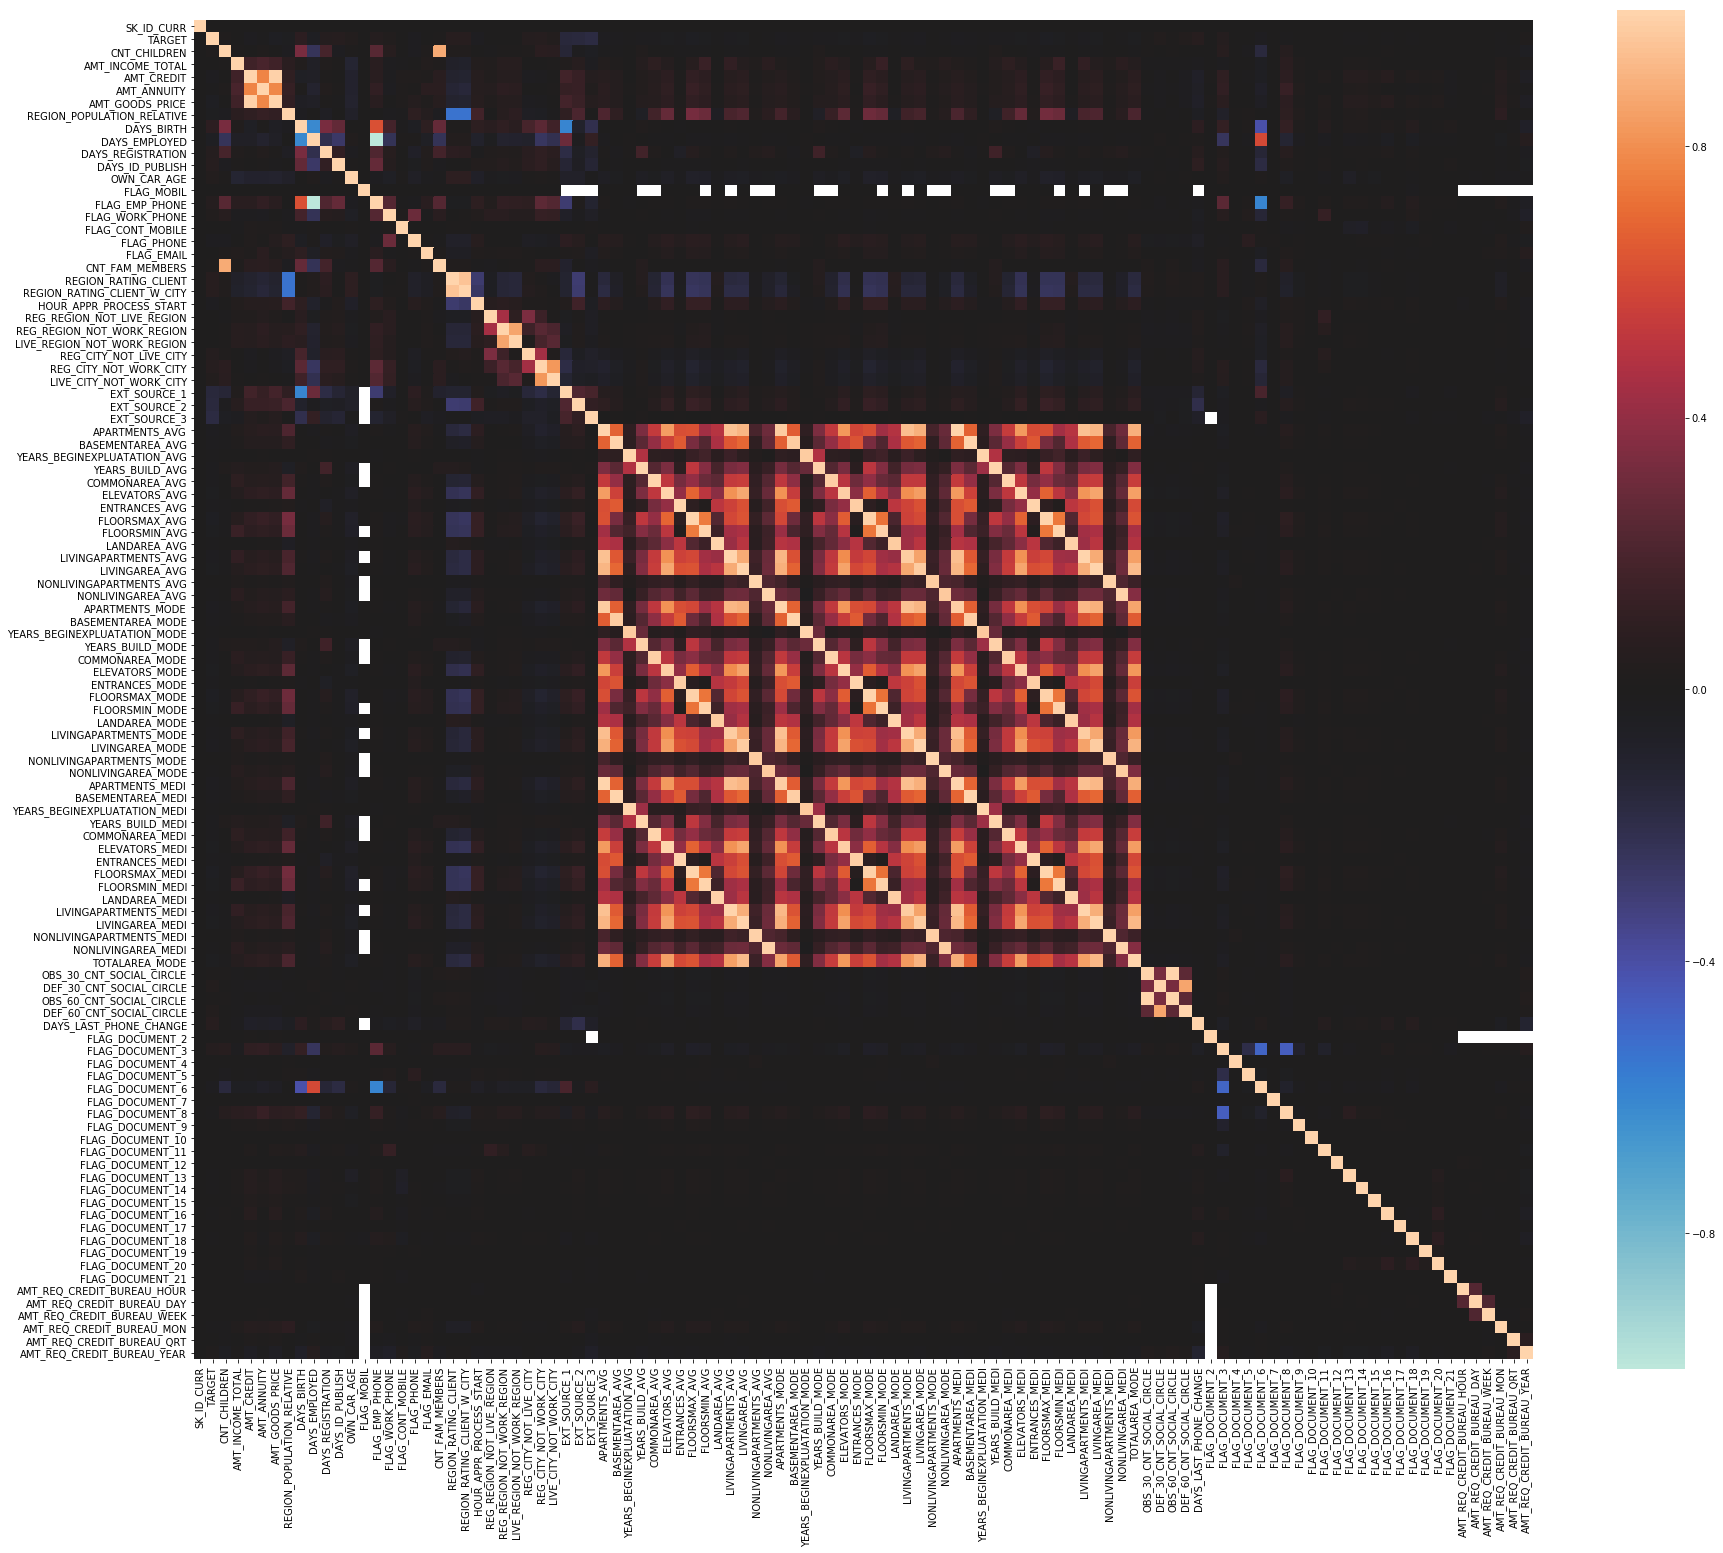

In [110]:
fig, ax = plt.subplots(figsize=(30, 25))
corr=train_２.corr()
sns.heatmap(corr, square=True, vmax=1, vmin=-1, center=0)
plt.show()

欠損値処理で除外していた特徴量のEXT_SOURCE_1が新たに浮上,調査してみる

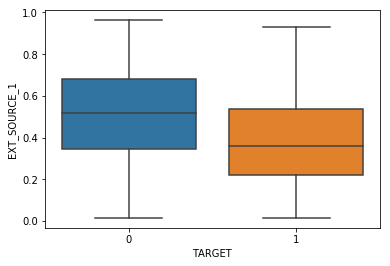

In [112]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_1', data=train_2)

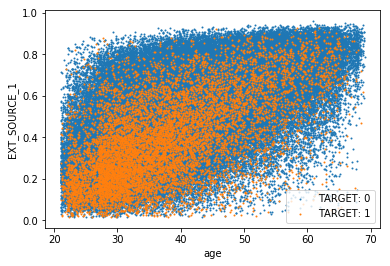

In [111]:
#EXT_SOURCE_１
plt.scatter(x=train_2[train_2["TARGET"]==0]["DAYS_BIRTH"]/(-365), y=train_2[train_2["TARGET"]==0]["EXT_SOURCE_1"], s=1, label="TARGET: 0")
plt.scatter(x=train_2[train_2["TARGET"]==1]["DAYS_BIRTH"]/(-365), y=train_2[train_2["TARGET"]==1]["EXT_SOURCE_1"], s=1, label="TARGET: 1")
plt.xlabel("age")
plt.ylabel("EXT_SOURCE_1")
plt.legend()
plt.show()

上図からEXT_SOURCE_１とDAYS_BIRTHには、正の相関があることがわかる。

欠損値処理はデータの相関を強調するのに有効だが、欠損値を含むデータ自体が重要な特徴量である可能性があるため、安直に欠損値処理するべきではないと学んだ。